In [1]:
%matplotlib inline

# load modules
import numpy as np
import SimpleITK as sitk

import sys
sys.path.append('../src')
import volumerendering
import imagedisplay

In [2]:
# Read the image
image = sitk.ReadImage('../sample_data/image2.nii.gz' )

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

### Projection of the volume onto a 2D plane

In [ ]:
# Several 2-D projections along the same axis
imagedisplay.myshow3d( image,
                       yslices=range(50,imageSize[2]-50,12),
                       zslices=range(50,imageSize[2]-50,12), 
                       dpi=10 )

### Projection of the volume onto a 2D plane .v2 (with ITK-SNAP)


In [4]:
# Use a different viewer by setting environment variable(s).
# Do this from within your ipython notebook using 'magic' functions, 
# or set in a more permanent manner using your OS specific convention. 

# To install itk-snap: (sudo) apt-get install itksnap

%env SITK_SHOW_COMMAND '/vol/bitbucket/oo2113/itksnap/itksnap-3.6.0-beta-20160928-Linux-x86_64/bin/itksnap'
try:
    sitk.Show(image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

env: SITK_SHOW_COMMAND='/vol/bitbucket/oo2113/itksnap/itksnap-3.6.0-beta-20160928-Linux-x86_64/bin/itksnap'


### Multi-plane projection and image labels

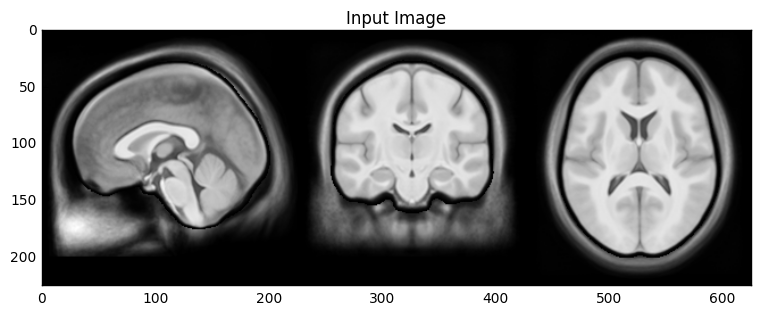

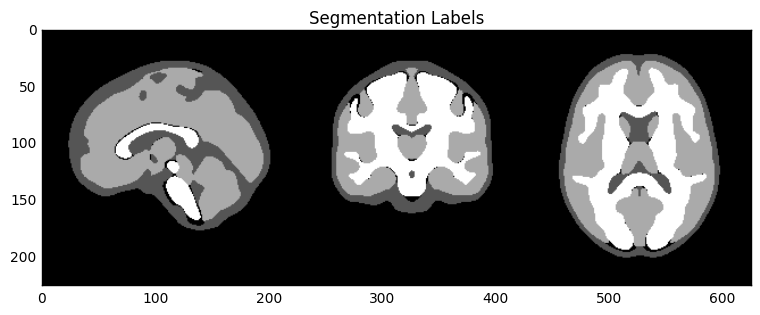

In [5]:
# Read the image
image = sitk.ReadImage('../sample_data/image.nii.gz')

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

# 3D planar view
slices =[ image[imageSize[0]/2,:,::-1],
          image[:,imageSize[1]/2,::-1], 
          image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Input Image", dpi=30)

# Load the annotations (gray matter, white matter, csf)
img_labels = sitk.ReadImage('../sample_data/labelmap.nii.gz')

# Display the annotations
slices = [ img_labels[imageSize[0]/2,:,::-1],
           img_labels[:,imageSize[1]/2,::-1],
           img_labels[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Segmentation Labels", dpi=30)

### Multi-plane projection - Ipython Widget Demonstration 

<function __main__.imagedisplay_interact>

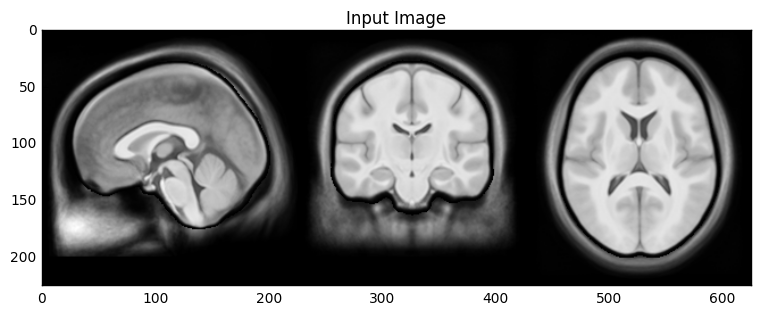

In [6]:
%matplotlib inline
from IPython.html.widgets import interact,fixed
from IPython.display import display
import matplotlib.pyplot as plt

def imagedisplay_interact(x,y,z,in_image,in_title):
    slices = [ in_image[x,:,::-1],
               in_image[:,y,::-1],
               in_image[:,:,z] ]
    return imagedisplay.myshow(sitk.Tile(slices, [3,1]), title=in_title, dpi=30)
    
# Intensity Image
img     = image
imgsize = img.GetSize()
disp = interact(imagedisplay_interact, 
         x=(1,imgsize[0],1), 
         y=(1,imgsize[1],1), 
         z=(1,imgsize[2],1), 
         in_image=fixed(img),
         in_title=fixed('Input Image')
        )
display(disp)

### Volume rendering

In [ ]:
# load the second image
image2 = sitk.ReadImage('../sample_data/image2.nii.gz')
data = sitk.GetArrayFromImage(image2) # numpy array

# converting the pixel type to uint8 and rescaling
data = data.astype('float')
data /= data.max()
data *= 255
data = data.astype('uint8')

# intensity window and opacity value
win_b = 39.0
win_e = 72.0
win_m = (win_b+win_e)/2
opacity = 0.2

# volume rendering transfer function
tf = [ [0,0,0,0,0],
       [win_b,0,0,0,0],
       [win_m,1,1,1,0.2],
       [win_e,1,1,1,0],
       [data.max(),1,1,1,0] ]

# perform volume rendering (a new window should be opened - vtk inline display is not supported)
actor_list = volumerendering.volumeRender( data,
                                           tf=tf,
                                           spacing=image2.GetSpacing() )
volumerendering.vtk_basic( actor_list, embed=False ) # embed = True: displays a screenshot in the notebook
                                                    # embed = False: interactive VTK window